<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Home_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set preparation

In [2]:
from google.colab import files 

uploaded = files.upload()

Saving train.csv to train.csv


import liblaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


[Problem 1] Selection of features for practice

In [6]:
data = df[['GrLivArea','YearBuilt','SalePrice']]

In [7]:
data.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [8]:
data.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


[Problem 2] Estimation and evaluation by linear regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


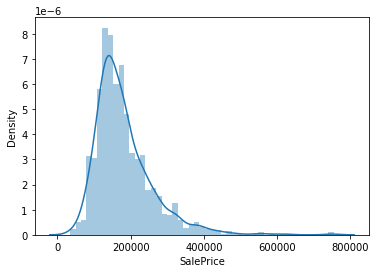

In [9]:
sns.distplot(data['SalePrice'])

In [10]:
q = data['SalePrice'].quantile(0.99)
data = data[data['SalePrice']<q]

In [11]:
data

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


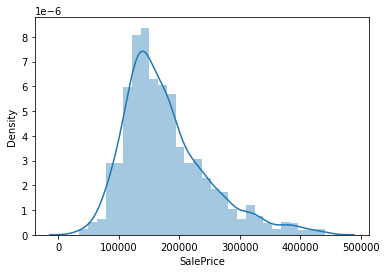

In [12]:
sns.distplot(data['SalePrice'])

In [13]:
data['logSalePrice'] = np.log(data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


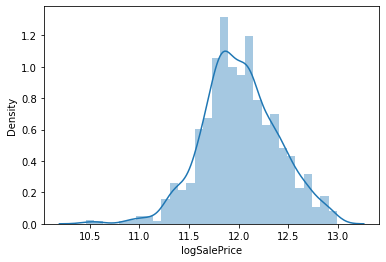

In [14]:
sns.distplot(data['logSalePrice'])

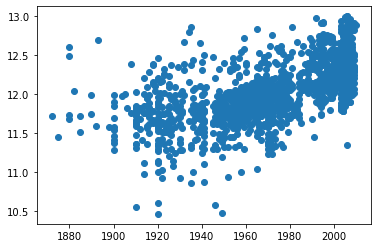

In [15]:
fig, ax1 = plt.subplots()

ax1.scatter(data['YearBuilt'],data['logSalePrice'])
plt.show()

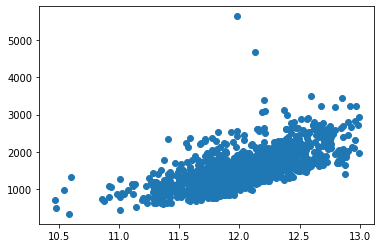

In [17]:
fig, ax1 = plt.subplots()

ax1.scatter(data['logSalePrice'],data['GrLivArea'])
plt.show()

In [18]:
q = data['GrLivArea'].quantile(0.99)
data = data[data['GrLivArea']<q]

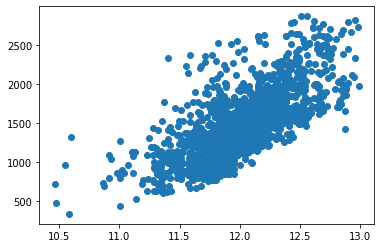

In [31]:
fig, ax1 = plt.subplots()

ax1.scatter(data['logSalePrice'],data['GrLivArea'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


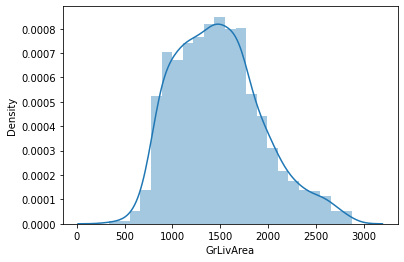

In [20]:
sns.distplot(data['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


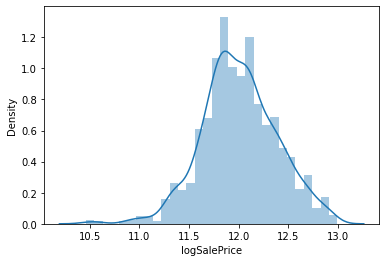

In [21]:
sns.distplot(data['logSalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


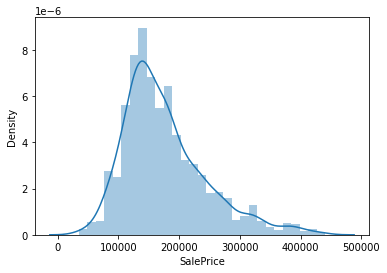

In [25]:
sns.distplot(data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


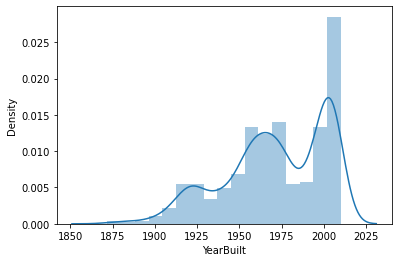

In [22]:
sns.distplot(data['YearBuilt'])

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = LinearRegression()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data[['GrLivArea','YearBuilt']], data['logSalePrice'], test_size=0.2, random_state=123)

In [53]:
model.fit(x_train, y_train)

LinearRegression()

In [54]:
model.score(x_train, y_train)

0.7162940269756293

In [55]:
predict1 = model.predict(x_test)

In [59]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, predict1))

Mean squared error: 0.04


(286,)

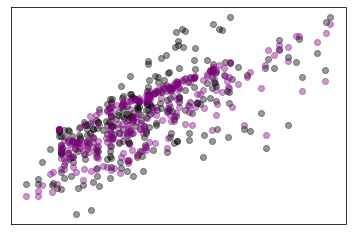

In [91]:
# Plot outputs
plt.scatter(x_test['GrLivArea'], y_test, color="black", alpha=0.4)
plt.scatter(x_test['GrLivArea'], predict1, color="purple", alpha=0.4)

plt.xticks(())
plt.yticks(())

plt.show()

[Problem 3] Comparison of methods


In [70]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print('svm predict: %.2f'%mean_squared_error(y_test, svm_pred))


svm predict: 0.04


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0)
cross_val_score(dtree, x_train, y_train, cv=10)

dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
print('dtree predict: %.2f'%mean_squared_error(y_test, dtree_pred))


dtree predict: 0.07


In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print('random forest predict: %.2f'%mean_squared_error(y_test, rf_pred))

random forest predict: 0.05
